https://pythonprogramming.net/quantopian-trading-strategies-introduction-python-programming-for-finance/?completed=/machine-learning-stock-prices-python-programming-for-finance/

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import style
import pickle
import pandas as pd
import pandas_datareader.data as web

In [3]:
style.use('ggplot')
sd = dt.datetime(2015, 1, 1)
ed = dt.datetime.now()

In [47]:
# df = web.DataReader('TSLA', 'yahoo', sd, ed)
df = pd.read_csv('data/stock_dfs/GOOG.csv')
df = pd.read_csv('data/stock_dfs/CBS.csv')
# df.head(20)
df.tail(20)

,Date,High,Low,Open,Close,Volume,Adj Close
2479,2019-11-07,38.299999,37.220001,37.349998,37.799999,4794800.0,37.799999
2480,2019-11-08,38.130001,37.200001,37.869999,38.110001,3722900.0,38.110001
2481,2019-11-11,39.220001,37.759998,38.209999,39.180000,8863500.0,39.180000
2482,2019-11-12,38.709999,37.290001,38.520000,37.759998,10050900.0,37.759998
2483,2019-11-13,37.619999,36.669998,37.500000,36.849998,5112800.0,36.849998
2484,2019-11-14,38.169998,36.970001,37.200001,37.630001,5789100.0,37.630001
2485,2019-11-15,38.889999,37.750000,37.919998,38.570000,7693100.0,38.570000
2486,2019-11-18,39.349998,37.880001,38.400002,39.340000,7007800.0,39.340000
2487,2019-11-19,39.680000,38.840000,39.410000,39.380001,6753000.0,39.380001
2488,2019-11-20,39.480000,38.529999,39.230000,39.009998,5065300.0,39.009998


In [46]:
cols = ['Date', # 'Adj Close', 'High', 'Low', 'Open', 'Close', 'Volume',
       'volume_cmf', 
       'volatility_bbm', 'volatility_bbw', 'volatility_bbhi', 'volatility_bbli',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_psar_up_indicator', 'trend_psar_down_indicator',
       'momentum_stoch', 'momentum_stoch_signal', 'momentum_roc', 'others_dr']

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch',
       'volatility_dchi', 'volatility_dcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_a',
       'trend_ichimoku_b', 'trend_visual_ichimoku_a',
       'trend_visual_ichimoku_b', 'trend_aroon_

In [40]:
# normalized_df = (df-df.min())/(df.max()-df.min())
# normalized_df = (df-df.min(numeric_only = True))/(df.max(numeric_only = True)-df.min(numeric_only = True))
# normalized_df
for col in df.columns[7:-4]:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dchi,volatility_dcli,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
2537,2020-02-03,1490.000000,1458.989990,1462.000000,1485.939941,3055200.0,1485.939941,0.988123,0.981400,0.805777,0.410225,0.757201,0.716665,0.408311,0.961638,0.593159,0.975128,0.979756,0.970373,0.497484,0.0,0.0,0.981432,0.981432,0.983691,0.0,0.0,0.966663,0.973378,0.0,0.0,0.826014,0.937001,0.459721,0.970837,0.972550,0.570958,0.526890,0.353809,0.698289,0.378854,0.601591,0.626150,0.926844,0.555383,0.225509,0.830985,0.843093,0.453666,0.972021,0.988708,0.981865,0.961304,0.708333,0.041667,0.833333,0.993878,NaN,0.993801,0.0,0.0,0.651790,0.582816,0.793933,0.518027,0.789377,0.454995,0.789377,0.720656,0.987856,3.247637,3.605416,3.541942,375.950424
2538,2020-02-04,1469.500000,1426.300049,1457.069946,1447.069946,3933000.0,1447.069946,0.987625,0.969384,0.746865,0.332973,0.732986,0.704133,0.397422,0.961638,0.664942,0.977250,0.977824,0.976794,0.453710,0.0,0.0,0.978669,0.978669,0.979064,0.0,0.0,0.966663,0.973378,0.0,0.0,0.792821,0.918468,0.423523,0.969960,0.973647,0.541350,0.444476,0.474170,0.598576,0.418163,0.502320,0.616303,0.935850,0.458362,0.283150,0.823990,0.842778,0.421087,0.970474,0.988708,0.982371,0.961304,0.666667,0.000000,0.833333,0.992726,NaN,0.992634,0.0,0.0,0.542976,0.530942,0.766053,0.521190,0.315434,0.411379,0.315434,0.710612,0.987277,-0.318937,-2.615852,-2.650674,363.500264
2539,2020-02-05,1463.839966,1430.560059,1462.420044,1448.229980,1986200.0,1448.229980,0.988030,0.975452,0.769082,0.337223,0.745386,0.703400,0.379778,0.962708,0.671603,0.979454,0.974900,0.984438,0.398176,0.0,0.0,0.975196,0.975196,0.974324,0.0,0.0,0.975688,0.973378,0.0,0.0,0.764534,0.896901,0.402616,0.969360,0.974732,0.513858,0.406287,0.433429,0.605394,0.439433,0.493887,0.604761,0.941108,0.448454,0.285951,0.816772,0.840696,0.395890,0.970469,0.988708,0.982371,0.965246,0.625000,0.000000,0.812500,0.991598,NaN,0.991491,0.0,0.0,0.545415,0.471121,0.746507,0.560510,0.329578,0.470313,0.329578,0.690532,0.986737,-2.172403,0.080164,0.080132,363.871826
2540,2020-02-06,1482.000000,1449.569946,1450.329956,1476.229980,1679400.0,1476.229980,0.991593,0.980583,0.784735,0.361172,0.761777,0.713923,0.401776,0.988552,0.678675,0.982341,0.974359,0.990954,0.361557,0.0,0.0,0.973705,0.973705,0.971274,0.0,0.0,0.988436,0.973378,0.0,0.0,0.769363,0.880797,0.440255,0.972262,0.977425,0.496195,0.441213,0.396227,0.621783,0.434101,0.509486,0.595362,0.947781,0.517473,0.281424,0.810780,0.837513,0.381946,0.969364,0.988708,0.980428,0.973479,0.583333,0.041667,0.770833,0.990491,NaN,0.990371,0.0,0.0,0.600796,0.481037,0.742749,0.572844,0.670983,0.429438,0.670983,0.693391,0.986792,-0.550394,1.933395,1.914942,372.840299
2541,2020-02-07,1485.839966,1466.349976,1467.300049,1479.229980,1172300.0,1479.229980,0.992835,0.984164,0.791683,0.361944,0.753486,0.711765,0.401904,0.991321,0.653650,0.984726,0.975031,0.995144,0.343611,0.0,0.0,0.973810,0.973810,0.972248,0.0,0.0,0.996573,0.973378,0.0,0.0,0.773116,0.868809,0.468600,0.975083,0.980100,0.481380,0.433956,0.376159,0.631287,0.468442,0.494752,0.58769

In [35]:
df.trend_macd[20:40]

20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25    0.349399
26    0.355622
27    0.362994
28    0.368372
29    0.378285
30    0.385582
31    0.395098
32    0.402231
33    0.409834
34    0.412468
35    0.413398
36    0.412210
37    0.412282
38    0.416306
39    0.424713
Name: trend_macd, dtype: float64

In [15]:
# import ta
# df = ta.add_all_ta_features(df, open='Open', high='High', low='Low', close='Close', volume='Volume')
pd.options.display.max_columns = None
df.head(20)

,Date,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dchi,volatility_dcli,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773,-1.863044e+05,3927000.0,-0.047442,NaN,NaN,NaN,-2.050999e+06,1000.000000,0.000000,312.204773,312.204773,312.204773,0.000000,0.0,0.0,312.246287,312.246287,309.621134,0.0,0.0,312.204773,312.204773,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,341.577597,-522.463762,-522.463762,0.000000,312.267044,312.267044,649.096976,642.019669,4.0,4.0,0.0,312.204773,NaN,NaN,0.0,0.0,100.000000,NaN,NaN,NaN,47.627905,47.627905,-52.372095,0.000000,NaN,NaN,-52.246376,NaN,0.000000
1,2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926,-1.526727e+06,-2104900.0,-0.153303,NaN,-56.627976,-56.627976,-2.078278e+06,1000.000000,0.000000,311.517349,312.892197,310.142502,2.749695,0.0,0.0,311.654338,311.654338,308.772639,0.0,0.0,310.829926,312.204773,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,-66.666667,342.265020,-523.515219,-522.989491,-0.525728,311.594559,311.594559,649.096976,642.019669,4.0,8.0,-4.0,310.829926,NaN,NaN,0.0,0.0,0.000000,NaN,-100.000000,NaN,30.740317,39.184111,-69.259683,0.000000,NaN,NaN,-0.440367,-0.441340,-0.440367
2,2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293,-7.957384e+06,-10092000.0,-0.443407,NaN,-519.783378,-288.205677,-2.279073e+05,1000.000000,0.000000,308.676331,316.789975,300.562686,16.227290,0.0,0.0,309.636624,309.636624,304.477627,0.0,1.0,302.994293,312.204773,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,-100.000000,345.106039,-527.860730,-524.613237,-3.247493,307.813736,307.813736,649.096976,642.019669,4.0,12.0,-8.0,313.579620,NaN,313.579620,0.0,1.0,0.000000,NaN,-100.000000,NaN,8.207255,28.858492,-91.792745,0.000000,NaN,NaN,-2.520874,-2.553193,-2.950141
3,2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735,-1.868171e+07,-22968600.0,-0.606104,NaN,-494.322546,-356.911300,-5.011057e+05,1000.000000,0.000000,305.492432,318.569892,292.414971,26.154921,0.0,0.0,306.812487,306.812487,300.782588,0.0,1.0,295.940735,312.204773,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,-116.655260,348.289938,-532.730698,-526.642602,-6.088095,304.399033,304.399033,649.096976,642.019669,4.0,16.0,-12.0,313.348985,NaN,313.348985,0.0,0.0,0.000000,NaN,-100.000000,NaN,3.933790,14.293787,-96.066210,0.000000,NaN,NaN,-2.327951,-2.355476,-5.209414
4,2010-01-08,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956,-1.084776e+07,-13484700.0,-0.269132,NaN,-190.344099,-315.269500,-1.733299e+05,1013.331118,0.000000,304.371136,316.898420,291.843853,25.054566,0.0,0.0,305.039301,305.039301,298.806659,0.0,0.0,295.940735,312.204773,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,-85.711071,349.411233,-534.445787,-528.203239,-6.242548,303.517334,303.517334,649.096976,642.019669,4.0,16.0,-12.0,312.623763,NaN,312.623763,0.0,0.0,21.497537,NaN,-94.848048,N

In [4]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volatility_atr',
       'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch',
       'volatility_dchi', 'volatility_dcli', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_a',
       'trend_ichimoku_b', 'trend_visual_ichimoku_a',
       'trend_visual_ichimoku_b', 'trend_aroon_

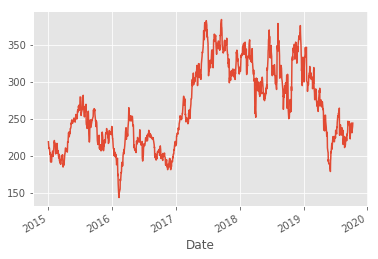

In [5]:
df['Adj Close'].plot()
plt.show()

In [6]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,214.699997
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,213.559998
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,212.907497
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,212.449997


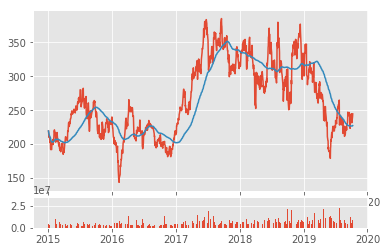

In [7]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [8]:
import mpl_finance
from mpl_finance import candlestick_ohlc
# from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [9]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_vol = df['Volume'].resample('10D').sum()

In [10]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2015-01-02,219.309998,219.309998,206.660004,206.660004
2015-01-12,202.210007,204.250000,191.869995,196.570007
2015-01-22,201.619995,206.550003,199.369995,203.600006
2015-02-01,210.940002,220.990005,210.940002,216.289993
2015-02-11,212.800003,217.110001,202.880005,217.110001


In [11]:
df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,735600.0,219.309998,219.309998,206.660004,206.660004
1,735610.0,202.210007,204.250000,191.869995,196.570007
2,735620.0,201.619995,206.550003,199.369995,203.600006
3,735630.0,210.940002,220.990005,210.940002,216.289993
4,735640.0,212.800003,217.110001,202.880005,217.110001


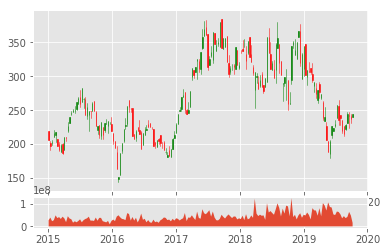

In [12]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_vol.index.map(mdates.date2num), df_vol.values, 0)
plt.show()

In [ ]:
import bs4 as bs
import requests
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    sp500 = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        sp500.append(ticker.rstrip())
    return sp500

In [13]:
def save_sp500_tickers():
    data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    table = data[0]
    header = table.iloc[0]
    table = table[1:]
    table = table.rename(columns=header)
    tickers = table['Symbol'].tolist()
    with open('data/sp500tickers.pickle', 'wb') as f:
        pickle.dump(tickers, f)
    return tickers
tickers = save_sp500_tickers()

In [14]:
import os
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open('data/sp500tickers.pickle', 'rb') as f:
            tickers = pickle.load(f)
    sd = dt.datetime(2013, 1, 1)
    ed = dt.datetime.now()
    for ticker in tickers:
        if not os.path.exists('data/stock_dfs'):
            os.makedirs('data/stock_dfs')
        if not os.path.exists('data/stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', sd, ed)
                df.to_csv('data/stock_dfs/{}.csv'.format(ticker))
            except Exception as e:
                print(ticker, e)
        else:
            print('{} df exists'.format(ticker))
get_data_from_yahoo()

MMM df exists
ABT df exists
ABBV df exists
ABMD df exists
ACN df exists
ATVI df exists
ADBE df exists
AMD df exists
AAP df exists
AES df exists
AMG df exists
AFL df exists
A df exists
APD df exists
AKAM df exists
ALK df exists
ALB df exists
ARE df exists
ALXN df exists
ALGN df exists
ALLE df exists
AGN df exists
ADS df exists
LNT df exists
ALL df exists
GOOGL df exists
GOOG df exists
MO df exists
AMZN df exists
AMCR df exists
AEE df exists
AAL df exists
AEP df exists
AXP df exists
AIG df exists
AMT df exists
AWK df exists
AMP df exists
ABC df exists
AME df exists
AMGN df exists
APH df exists
ADI df exists
ANSS df exists
ANTM df exists
AON df exists
AOS df exists
APA df exists
AIV df exists
AAPL df exists
AMAT df exists
APTV df exists
ADM df exists
ARNC df exists
ANET df exists
AJG df exists
AIZ df exists
ATO df exists
T df exists
ADSK df exists
ADP df exists
AZO df exists
AVB df exists
AVY df exists
BHGE df exists
BLL df exists
BAC df exists
BK df exists
BAX df exists
BBT df exists
BDX

In [25]:
def compile_data():
    with open('data/sp500tickers.pickle', 'rb') as f:
        tickers = pickle.load(f)
    results = pd.DataFrame()
    for i, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('data/stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
#             df['{}_HL_pct_diff'.format(ticker)] = (df['High'] - df['Low']) / df['Low']
#             df['{}_daily_pct_chng'.format(ticker)] = (df['Close'] - df['Open']) / df['Open']
            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
            if results.empty:
                results = df
            else:
                results = results.join(df, how='outer')
        except Exception as e:
            print(ticker, e)
        if i % 10 == 0:
            print(i)
    print(results.head())
    results.to_csv('sp500_closes.csv')
    
compile_data()

0
10
20
30
40
50
60
70
BRK.B File b'data/stock_dfs/BRK.B.csv' does not exist
80
BF.B File b'data/stock_dfs/BF.B.csv' does not exist
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM        ABT       ABBV   ABMD        ACN       ATVI  \
Date                                                                       
2013-01-02  79.758415  27.926201  27.193508  13.69  59.578766  10.310681   
2013-01-03  79.665848  28.989225  26.968964  13.45  59.363071  10.367179   
2013-01-04  80.254913  28.814959  26.628265  13.41  59.690914  10.517838   
2013-01-07  80.355881  29.050213  26.682472  13.25  59.432095  10.527254   
2013-01-08  80.364304  29.058924  26.101748  13.21  59.777180  10.348347   

                 ADBE   AMD        AAP       AES ...        WLTW        WYNN  \
Date                                             ...                           
2013-01-

In [26]:
df = pd.read_csv('sp500_closes.csv')
df_corr = df.corr()
df_corr.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.690644,0.924884,0.801699,0.825658,0.912009,0.778979,0.633963,0.312135,0.315753,...,0.785965,0.115845,0.841901,0.508505,0.677936,0.865935,0.778883,0.807439,0.853548,0.737588
ABT,0.690644,1.000000,0.779169,0.832596,0.932257,0.676023,0.962767,0.918227,0.367817,0.793440,...,0.941592,0.089601,0.894874,0.572342,0.934278,0.911115,0.963907,0.693981,0.780201,0.973478
ABBV,0.924884,0.779169,1.000000,0.889737,0.857684,0.905202,0.851202,0.669805,0.256589,0.409924,...,0.806051,0.211651,0.797513,0.479013,0.693681,0.896810,0.813324,0.710303,0.900316,0.804444
ABMD,0.801699,0.832596,0.889737,1.000000,0.885517,0.863330,0.922284,0.787829,0.316501,0.559280,...,0.796480,0.096602,0.821332,0.315719,0.773432,0.898764,0.855575,0.615793,0.882773,0.856597
ACN,0.825658,0.932257,0.857684,0.885517,1.000000,0.846258,0.974309,0.900880,0.362106,0.616730,...,0.957727,0.005205,0.959071,0.473380,0.897730,0.969767,0.958411,0.766993,0.860853,0.974752


In [1]:
def visualize_data():
    df = pd.read_csv('sp500_closes.csv')
    df_corr = df.corr()
    corrs = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    heatmap1= ax1.pcolor(corrs, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    ax1.set_xticks(np.arange(corrs.shape[1])+0.5, minor=False)
    ax1.set_yticks(np.arange(corrs.shape[0])+0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    col_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(col_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
#     plt.savefig('cor.png')
    plt.show()
visualize_data()

NameError: name 'pd' is not defined

In [28]:
df = pd.read_csv('sp500_closes.csv', index_col=0)
df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,79.758415,27.926201,27.193508,13.69,59.578766,10.310681,38.340000,2.53,71.585838,8.837808,...,78.928162,97.898666,21.486698,15.530575,31.753428,24.999222,42.287354,63.767414,20.332291,NaN
2013-01-03,79.665848,28.989225,26.968964,13.45,59.363071,10.367179,37.750000,2.49,71.585838,8.789598,...,79.734497,98.951675,21.423912,15.530575,31.693514,24.917400,42.551826,64.681076,20.360031,NaN
2013-01-04,80.254913,28.814959,26.628265,13.41,59.690914,10.517838,38.130001,2.59,72.701752,8.998492,...,79.711494,100.145653,21.502390,15.357772,31.248316,24.881042,43.017757,65.010742,20.942539,NaN
2013-01-07,80.355881,29.050213,26.682472,13.25,59.432095,10.527254,37.939999,2.67,72.454865,8.717291,...,79.481110,100.485619,21.274820,15.616977,31.119894,24.553778,42.746994,65.170853,20.840830,NaN
2013-01-08,80.364304,29.058924,26.101748,13.21,59.777180,10.348347,38.139999,2.67,71.269798,8.717291,...,79.089447,100.402710,21.314045,15.595379,30.486374,24.253788,40.952507,65.265068,20.424749,NaN


In [29]:
def process_data_for_labels(ticker, pred_days=7):
    df = pd.read_csv('sp500_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    for i in range(1, pred_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i)-df[ticker])/df[ticker]
    df.fillna(0, inplace=True)
    return tickers, df

In [42]:
def buy_sell_hold(*args):
    # this function will be mapped to a Pandas DataFrame column
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [43]:
from collections import Counter
def extract_featureset(ticker):
    ticker, df = process_data_for_labels(ticker)
    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))
    
#     df['{}_target'.format(ticker)] = list(map( buy_sell_hold, 
#                                              df['{}_1d'.format(ticker)],
#                                              df['{}_2d'.format(ticker)],
#                                              df['{}_3d'.format(ticker)],
#                                              df['{}_4d'.format(ticker)],
#                                              df['{}_5d'.format(ticker)],
#                                              df['{}_6d'.format(ticker)],
#                                              df['{}_7d'.format(ticker)]                                             
#                                              ))
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals.fillna(0, inplace=True)
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df

In [44]:
# extract_featureset('MMM')
ticker, df = process_data_for_labels('AAPL')
df['{}_target'.format(ticker)] = list(map( buy_sell_hold, 
                                             df['{}_1d'.format(ticker)],
                                             df['{}_2d'.format(ticker)],
                                             df['{}_3d'.format(ticker)],
                                             df['{}_4d'.format(ticker)],
                                             df['{}_5d'.format(ticker)],
                                             df['{}_6d'.format(ticker)],
                                             df['{}_7d'.format(ticker)]                                             
                                             ))

KeyError: "['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CDW', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'MYL', 'NDAQ', 'NOV', 'NKTR', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTN', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SYK', 'STI', 'SIVB', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TFX', 'TXN', 'TXT', 'TMO', 'TIF', 'TWTR', 'TJX', 'TSCO', 'TDG', 'TRV', 'TRIP', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WCG', 'WFC', 'WELL', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']_1d"

In [34]:
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

/nfs_shares/xzw0005_home/conda_envs/torch/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
def do_ml(ticker):
    X, y, df = extract_featureset(ticker)
    Xtrain, Xtest, Ytrain, Ytest = cross_validation.train_test_split(X, y, test_size=0.25)
    clf = neighbors.KNeighborsClassifier()
    clf.fit(Xtrain, Ytrain)
    confidence = clf.score(Xtest, Ytest)
    print('accuracy: ', confidence)
    preds = clf.predict(Xtest)
    print('predicted class counts: ', Counter(preds))

In [36]:
do_ml('XOM')

KeyError: "['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CDW', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'MYL', 'NDAQ', 'NOV', 'NKTR', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTN', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SYK', 'STI', 'SIVB', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'FTI', 'TFX', 'TXN', 'TXT', 'TMO', 'TIF', 'TWTR', 'TJX', 'TSCO', 'TDG', 'TRV', 'TRIP', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WCG', 'WFC', 'WELL', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']_1d"